# 7CCMFM18 Machine Learning
King's College London <br>
Academic year 2022-2023 <br>
Lecturer: Mario Martone

## Example: Underfitting and Overfitting
First version: <i>7th March 2023</i>

In this exercise, you’ll learn how a neural network with too low or too high capacity, can underfit or overfit your data. We will build a network which will infer the quality of red wine from various other characteristics.

First importing the correct libraries:

In [137]:
import pandas as pd
from IPython.display import display
from tensorflow import keras
from tensorflow.keras import layers, callbacks

Now to set things up download the redwine.csv dataset from Keats, put it in the same folder as the notebook and run the cell below:

In [155]:
#Load dataset from CSV file, setting the first column as the index
red_wine = pd.read_csv('redwine_data.csv',index_col=0)

# Create training and validation splits
# Randomly split the data into training (70%) and validation (30%) sets with fixed random state for reproducibility
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1] for both training and validation data
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Separate the features (X) from the target variable 'quality' (y) for both training and validation datasets
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

# Define the input shape for the neural network based on feature count
input_shape=[X_train.shape[1]]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1110,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1033,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1003,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
488,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Now let's build a model and train it to check its performance:

In [156]:
Define a neural network model with one input layer and one output layer
model = keras.Sequential([
    layers.Dense(1, activation='relu', input_shape=input_shape),
    layers.Dense(1),
])
#Compile the model with Adam optimizer and mean squared error loss function
model.compile(
    optimizer='adam',
    loss='mse',
)

Let's train it and plot how the test/validation as well as the training loss behave as a function of the epochs:

Minimal validation loss: 0.10842034220695496
Final validation loss: 0.10842034220695496


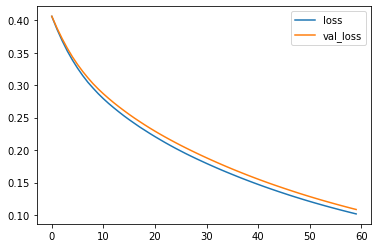

In [157]:
Train the model on the training data and validate on the validation data for 60 epochs with a batch size of 256
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=60,
    verbose=0,  # turn off training log
)

#Convert the training history into a DataFrame and plot the training and validation loss
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot();
print("Minimal validation loss: {}".format(history_df['val_loss'].min()))
print("Final validation loss: {}".format(history_df['val_loss'].iloc[-1]))

It's not uncommon for the curves to follow more rapidly in the beginning, this is often called a "hockey stick" pattern. This makes the final part of training hard to see, so let's start at epoch 15 instead:

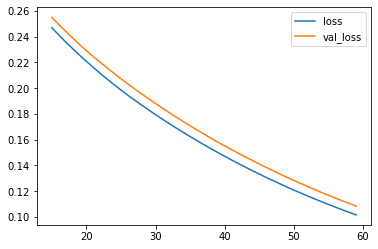

In [158]:
#Plot the training and validation loss after epoch 15 to focus on later epochs
history_df.loc[15:, ['loss', 'val_loss']].plot();

# Questions:

1. How does this network fit the data? Does it underfit, overfit or is it just about right?

2. Build a wider model with a 50 dimensional hidden layer, train it and plot loss/val_loss. How does this fit the data?

3. Build a deeper model with two 10 dimensional hidden layers, train it and plot loss/val_loss. How does this fit the data?

4. Build a wider and deeper model with two 200 dimensional hidden layers, train it and plot loss/val_loss. How does this fit the data? 

Please provide clear arguments for each one of your choices.

# Answers:

### 1.

The training and validation error go down continuously so there is no sign of overfitting. The curve is not very steep and the minimal validation loss is quite large. This model is likely underfitting the problem.

### 2.

Let's make the discussed modification and run the training:

In [101]:
#Redefine the model with a new structure: one hidden layer with 50 neurons, and retrain
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=input_shape),
    layers.Dense(1),
])
#Compilation and training steps are repeated as above
model.compile(
    optimizer='adam',
    loss='mse',
)

Let's train it and plot how the test/validation as well as the training loss behave as a function of the epochs:

Minimal validation loss: 0.01620616763830185
Final validation loss: 0.01625980995595455


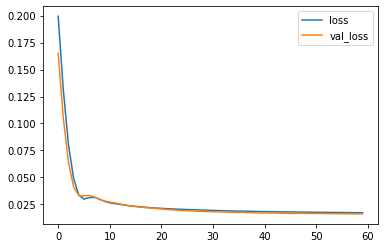

In [102]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=60,
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot();
print("Minimal validation loss: {}".format(history_df['val_loss'].min()))
print("Final validation loss: {}".format(history_df['val_loss'].iloc[-1]))

Now the "hockey stick" is much more prominent, let's look at how the losses decrease after the first 15 epochs:

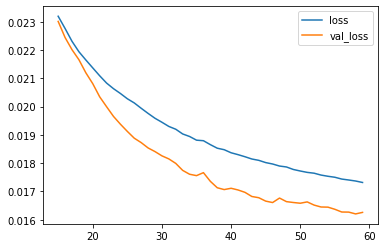

In [103]:
history_df.loc[15:, ['loss', 'val_loss']].plot();

The minimum validation error is far smaller than before and it keeps getting smaller with training since the final is almost the minimum. This appears to be fitting the problem well!

### 3.

Let's make the discussed modification and run the training:

In [104]:
Define another model, this time with two hidden layers each with 10 neurons, and retrain
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=input_shape),
    layers.Dense(10, activation='relu', input_shape=input_shape),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mse',
)

Let's train it and plot how the test/validation as well as the training loss behave as a function of the epochs:

Minimal validation loss: 0.018962053582072258
Final validation loss: 0.018962053582072258


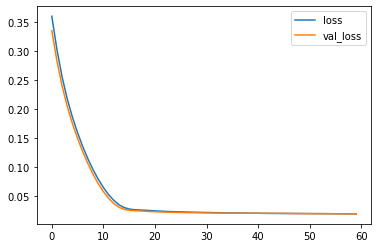

In [105]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=60,
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot();
print("Minimal validation loss: {}".format(history_df['val_loss'].min()))
print("Final validation loss: {}".format(history_df['val_loss'].iloc[-1]))

Again the "hockey stick" is very prominent, let's look at how the losses decrease after the first 15 epochs:

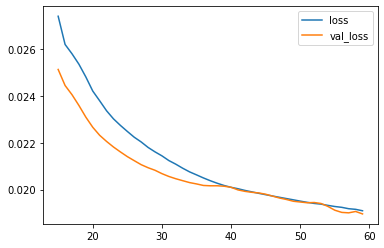

In [106]:
history_df.loc[15:, ['loss', 'val_loss']].plot();

Again the minimum validation error is still very small and it keeps getting smaller with training. In fact in this case the final validation error is in fact the minimum! This appears to be fitting the problem well!

### 4.

Let's make the discussed modification and run the training:

In [133]:
model = keras.Sequential([
    layers.Dense(200, activation='relu', input_shape=input_shape),
    layers.Dense(200, activation='relu', input_shape=input_shape),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mse',
)

Let's train it and plot how the test/validation as well as the training loss behave as a function of the epochs:

Minimal validation loss: 0.015595680102705956
Final validation loss: 0.01697654277086258


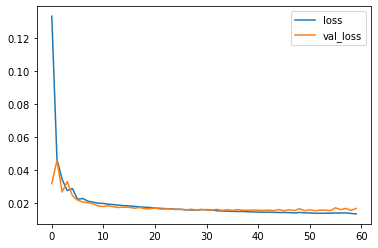

In [134]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=60,
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot();
print("Minimal validation loss: {}".format(history_df['val_loss'].min()))
print("Final validation loss: {}".format(history_df['val_loss'].iloc[-1]))

Let's look at the final epochs:

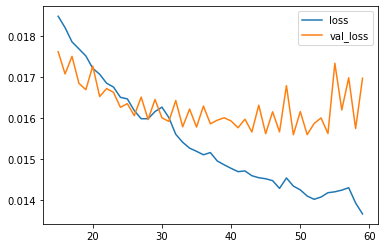

In [135]:
history_df.loc[15:, ['loss', 'val_loss']].plot();

Here we can see that the two errors start diverging. Let's train it for a few more epochs:

Minimal validation loss: 0.015725843608379364
Final validation loss: 0.017189107835292816


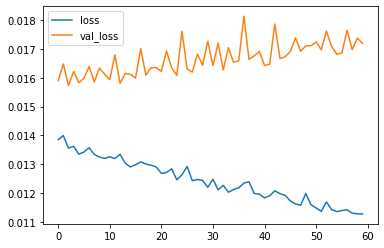

In [136]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=60,
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot();
print("Minimal validation loss: {}".format(history_df['val_loss'].min()))
print("Final validation loss: {}".format(history_df['val_loss'].iloc[-1]))

The validation error is in fact going up with time. This is a clear sign of overfitting!